# Filter methods
- Rely on the feature characteristics, not use ML algorithms.


**1. Advantages**:
- The selected subset can be used for any ML models
- Less computationally expensive


**2. Disavantages**:
- Lower prediction performance than other methods.
- Do not score the effect of subset to the model algorithms
- May choose redudant variables because do not consider the relationships between features
- Ignore some features that may be not predictive individually, but they have in combination with others


**3. Usage**:
- **Provide quick screen and fast remove the irrelevant features**
- **The first filter step in feature selection**


**4. Produce steps**:
- Rank features according to a certain criteria (test), independently of feature space
- Choose highest rank features 


**5. Rank Criteria**:
- Basis
    - Constanst
    - Quasi - constanst
- Statistics measures
    - Fisher score, Chi-square test
    - Univariate methods (anova)
    - Mutual information
- Multivariate:
    - Handle the redudant features
    - Duplicated features
    - Correlated features
    

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
# load dataset
data = pd.read_csv('Datasets/dataset_1.csv')

# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

## Constant features
Constant features are those that show the same value, just one value, for all the observations of the dataset. In other words, the same value for all the rows of the dataset. These features provide no information that allows a machine learning model to discriminate or predict a target.

In [3]:
from sklearn.feature_selection import VarianceThreshold

# If using the VarianceThreshold, all our variables need to be numerical
sel = VarianceThreshold(threshold=0) # remove all features that have their variances do not meet a certain threshold

sel.fit(X_train)  # fit finds the features with zero variance

VarianceThreshold(threshold=0)

In [4]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant

sum(sel.get_support())

266

In [6]:
X_train.loc[:,~sel.get_support()].head()

,var_23,var_33,var_44,var_61,var_80,var_81,var_87,var_89,var_92,var_97,...,var_195,var_196,var_201,var_212,var_215,var_225,var_227,var_248,var_294,var_297
17967,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0.0,0,0,0
32391,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0.0,0,0,0
9341,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0.0,0,0,0
7929,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0.0,0,0,0
46544,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0.0,0,0,0


## Quasi-constant features
Quasi-constant features are those that show the same value for the great majority of the observations of the dataset. In general, these features provide little, if any, information that allows a machine learning model to discriminate or predict a target. But there can be exceptions.

In [8]:
from sklearn.feature_selection import VarianceThreshold

# If using the VarianceThreshold, all our variables need to be numerical
sel = VarianceThreshold(threshold=0.02) # remove all features that have their variances do not meet a certain threshold

sel.fit(X_train)

# transform
X_train_sl = sel.transform(X_train)
X_test_sl = sel.transform(X_test)

print(X_train.shape, X_train_sl.shape)

(35000, 300) (35000, 210)


In [11]:
# code manually for both categorical and numeric variables (VarianceThreshold just use for numeric)
def get_quasi_constant_feat(X_train, dom_thold = 0.98):
    # create an empty list
    quasi_constant_feat = []

    # iterate over every feature
    for feature in X_train.columns:

        # find the predominant value, that is the value that is shared
        # by most observations
        predominant = X_train[feature].value_counts(
            normalize=True).sort_values(ascending=False).values[0]

        # evaluate the predominant feature: do more than 99% of the observations
        # show 1 value?
        if predominant > dom_thold:

            # if yes, add the variable to the list
            quasi_constant_feat.append(feature)
            
    return quasi_constant_feat

quasi_constant_feat = get_quasi_constant_feat(X_train)
print(len(quasi_constant_feat)) # number of variables that each would be dominated above 98% by 1 value.

# finally, let's drop the quasi-constant features:
X_train_sl = X_train.drop(labels=quasi_constant_feat, axis=1)
X_test_sl = X_test.drop(labels=quasi_constant_feat, axis=1)

X_train.shape, X_train_sl.shape

186


((35000, 300), (35000, 114))

## Duplicated features
we may often introduce duplicated features when performing one hot encoding of categorical variables, particularly if our datasets have many and /or highly cardinal categorical variables.



In [13]:
from feature_engine.selection import DropDuplicateFeatures

# set up the selector
sel = DropDuplicateFeatures(variables=None, missing_values='raise')

# find the duplicate features, this might take a while
sel.fit(X_train)

# set dup features
sel.duplicated_feature_sets_

[{'var_151', 'var_6'},
 {'var_116', 'var_7'},
 {'var_112',
  'var_113',
  'var_120',
  'var_122',
  'var_127',
  'var_135',
  'var_158',
  'var_167',
  'var_170',
  'var_171',
  'var_182',
  'var_195',
  'var_196',
  'var_201',
  'var_212',
  'var_215',
  'var_225',
  'var_23',
  'var_248',
  'var_294',
  'var_297',
  'var_33',
  'var_44',
  'var_61',
  'var_80',
  'var_81',
  'var_87',
  'var_92',
  'var_97',
  'var_99'},
 {'var_183', 'var_34'},
 {'var_104', 'var_36'},
 {'var_148', 'var_37'},
 {'var_106', 'var_43'},
 {'var_216', 'var_60'},
 {'var_66', 'var_69'},
 {'var_287', 'var_67'},
 {'var_289', 'var_71'},
 {'var_199', 'var_84'},
 {'var_178', 'var_180', 'var_227', 'var_89'},
 {'var_133', 'var_223'},
 {'var_143', 'var_296'},
 {'var_149', 'var_239'},
 {'var_177', 'var_250'},
 {'var_187', 'var_285'},
 {'var_221', 'var_263'},
 {'var_226', 'var_232'},
 {'var_229', 'var_269'}]

In [15]:
from sklearn.pipeline import Pipeline

# in pipeline
# need to remove constant features first
pipe = Pipeline([
    ('constant', VarianceThreshold(threshold=0.02)),
    ('duplicated', DropDuplicateFeatures()),
])

pipe.fit(X_train)

Pipeline(steps=[('constant', VarianceThreshold(threshold=0.02)),
                ('duplicated', DropDuplicateFeatures())])

In [16]:
# or pipeline
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
])

pipe.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures())])

## Correlation features
- Select subset contain features highly `correlated` with `target`, but yet `uncorrelated` to each other.
- Why need to handle correlated features in ML model ?
    - Adding more correlated feature will add little information
    - High dimensionality
    - Affect to model interpretability
    - With different classifiers show the different sesitivity to correlation with target of each feature
- Type of correlation:
    - Linear: pearson
    - Non-linear: kendall, spearman rank, mutual-information

In [17]:
# load dataset
data = pd.read_csv('Datasets/dataset_2.csv')

# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def corr_heatmap(data, method = 'pearson'):
    corrmat = data.corr(method=method)
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    return sns.heatmap(corrmat, cmap=cmap)

def corr_scat( var1, var2, data):
    plt.scatter(data[var1], data[var2])
    corr = np.round(np.corrcoef(X_train[var1], X_train[var2])[0, 1],2)
    plt.ylabel(var2)
    plt.xlabel(var1)
    plt.title(f'corr({var1}, {var2}) = {corr}')
    plt.show()

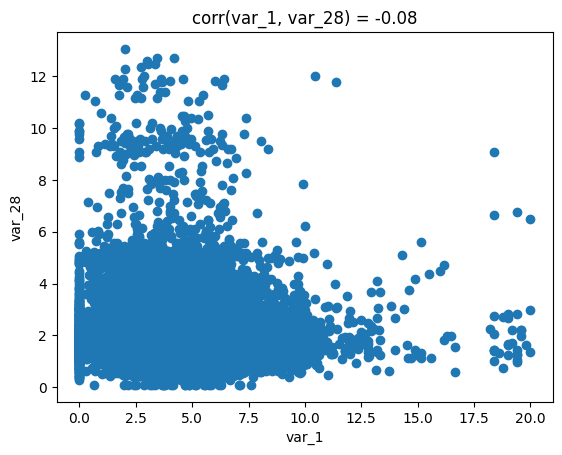

In [25]:
corr_scat('var_1', 'var_28' ,X_train)

<AxesSubplot: >

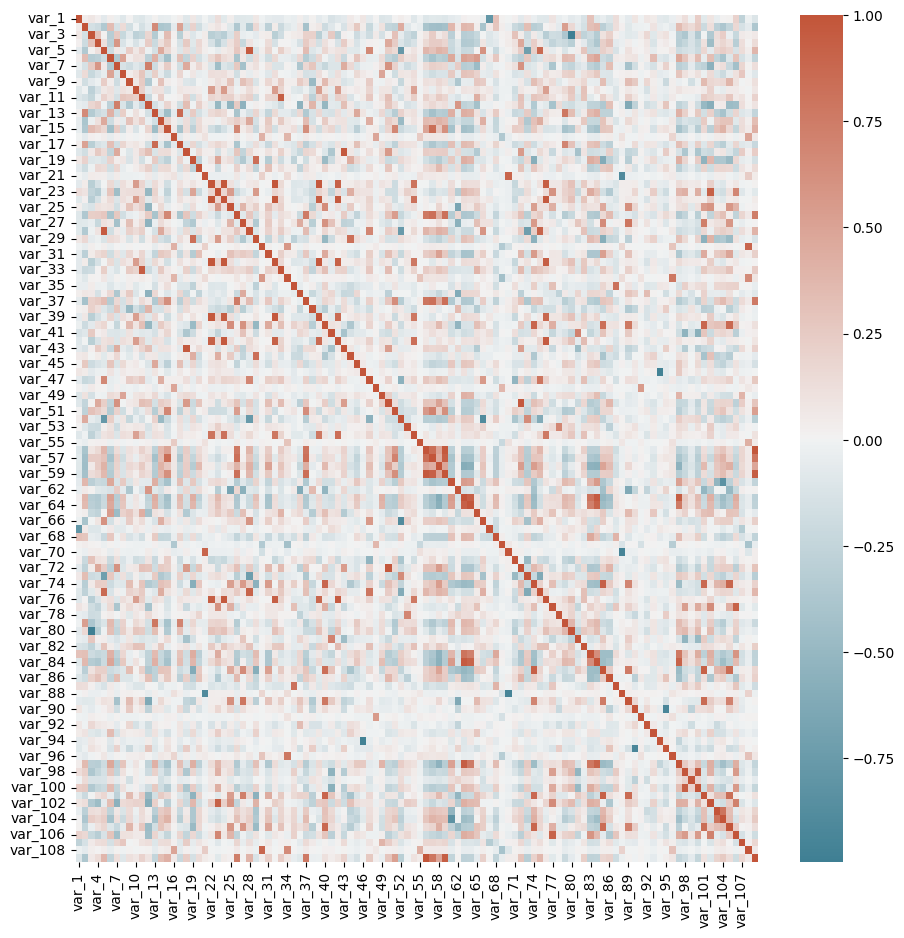

In [21]:
corr_heatmap(X_train)

### brute force approach
- it will remove the first feature that is correlated with anything else without any further insight.

In [26]:
def correlation(dataset, threshold):
    
    # create a set where I will store the names of correlated columns
    col_corr = set()
    
    # create the correlation matrix
    corr_matrix = dataset.corr()
    
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        
        # check with other features
        for j in range(i):
            
            # if the correlation is higher than a certain threshold
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                # print correlation, and variables examined
                # keep in mind that the columns and rows of the dataframe are identical
                # so we can identify the features being examned by looking for i,j
                # in the column names
                print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
                
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                
                # and add it to our correlated set
                col_corr.add(colname)
                
    return col_corr

### highly corr group approach
- The second approach looks to identify groups of highly correlated features. And then, we can make further investigation within these groups to decide which feature we keep and which one we remove.

**In this group, several features are highly correlated. Which one should we keep and which ones should we remove?**

- One criteria to select which features to use from this group, would be to use those with **less missing data**. 
- Our dataset contains no missing values, so this is not an option. But keep this in mind when you work with your own datasets.

In [ ]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

In [ ]:
# find groups of correlated features

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

### Correlation with Feature-engine

- The `DropCorrelatedFeatures` class from Feature-engine does a similar job to the `brute force approach` that we described earlier.

- The `SmartCorrelationSelection` allows us to select a feature from each correlated group based on model performance, number of missing values, cardinality or variance.

In [27]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

#### DropCorrelatedFeatures
- drop features by threshold of correlation

In [29]:
from feature_engine.selection import DropCorrelatedFeatures

# set up the selector
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method='pearson',
    missing_values='ignore'
)

# find correlated features
sel.fit(X_train)

# each set contains a group of correlated features
sel.correlated_feature_sets_

[{'var_3', 'var_80'},
 {'var_28', 'var_5', 'var_75'},
 {'var_11', 'var_33'},
 {'var_13', 'var_17'},
 {'var_15', 'var_57'},
 {'var_18', 'var_43'},
 {'var_19', 'var_29'},
 {'var_21', 'var_70', 'var_88'},
 {'var_22', 'var_24', 'var_32', 'var_39', 'var_42', 'var_76'},
 {'var_102', 'var_23'},
 {'var_26', 'var_59'},
 {'var_108', 'var_30'},
 {'var_35', 'var_87'},
 {'var_101', 'var_105', 'var_40', 'var_74', 'var_85'},
 {'var_46', 'var_94'},
 {'var_50', 'var_72'},
 {'var_52', 'var_66'},
 {'var_109', 'var_56'},
 {'var_104', 'var_60'},
 {'var_63', 'var_64', 'var_84', 'var_97'},
 {'var_106', 'var_77'},
 {'var_90', 'var_95'},
 {'var_100', 'var_98'}]

In [33]:
# the transformer selects 1 feature from each group.
# the rest will be removed and can be found in this attribute
sel.features_to_drop_

{'var_100',
 'var_101',
 'var_102',
 'var_104',
 'var_105',
 'var_106',
 'var_108',
 'var_109',
 'var_17',
 'var_24',
 'var_28',
 'var_29',
 'var_32',
 'var_33',
 'var_39',
 'var_42',
 'var_43',
 'var_57',
 'var_59',
 'var_64',
 'var_66',
 'var_70',
 'var_72',
 'var_74',
 'var_75',
 'var_76',
 'var_80',
 'var_84',
 'var_85',
 'var_87',
 'var_88',
 'var_94',
 'var_95',
 'var_97'}

#### SmartCorrelationSelection by Performance

We will keep a feature from each correlation group based on the performance of a random forest:
- For each feature from each correlation group, use `random forest` to get performance of model base on `scoring` metric
- Select the feature of each group with highest performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import SmartCorrelatedSelection

# random forest
rf = RandomForestClassifier( n_estimators=10, random_state=20, n_jobs=4,)

# correlation selector
# this may take a while, because we are training a random forest per correlation group
sel = SmartCorrelatedSelection(
    variables=None, 
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="model_performance",
    estimator=rf,
    scoring="roc_auc",
    cv=3,
)

sel.fit(X_train, y_train)

#### SmartCorrelationSelection by Variance

Alternatively, we can select the feature with the highest variance from each group.

In [ ]:
from feature_engine.selection import SmartCorrelatedSelection

# correlation selector
sel = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="variance", # 'cardinality' if select feature with highest number of unique values
    estimator=None,
    scoring="roc_auc",
    cv=3,
)

sel.fit(X_train, y_train)

#### pipeline

In [ ]:
# we stack all the selection methods inside a pipeline

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(selection_method='variance')),
])

pipe.fit(X_train)

## Statistic test

- Produce:
    - S1: Rank features based on certain criteria / metrics
    - S2: Select features with highest rankings
- Advantages: 
    - Fast
- Disadvantages: 
    - Do not tracking the feature redundancy
    
**sklearn type of selection**
- `SelectKBest`: select top k highest rank of pool
- `SelectPercentile`: select top p% highest rank of pool
- `SelectFdr`: (false discovery rate `FDR` = `FP` / (`FP` + `TP`) ) giới hạn xác suất bắt sai positive khi dự đoán `positive`: `FDR` < `alpha`
- `SelectFpr`: (false positive rate `FPR` = `FP` / (`FP` + `TN`) ) giới hạn xác suất bắt sai `positive ngoài thực tế`: `FPR` < `alpha`
- `SelectFwe`: (family wise error is the probability of incurring at least one false positive among all discoveries) Select the `pvalues` < (`alpha`/`n_features`)
- `GenericUnivariateSelect`: add `mode` to select {`percentile`, `k_best`, `fpr`, `fdr`, `fwe`}, default=`percentile`

### Mutual information
- `Mutual information` is a measure of the mutual dependence of 2 variables, in others words, quanlifies the amount of information gained about 1 random variables through observing the other. The mutual information measures the reduction in uncertainty in variable A when variable B is known.
- To select variables, we are interested in the `mutual information` between the `predictor variables` and the `target`. Higher mutual information values, indicate little uncertainty about the target `Y` given the predictor `X`.

**Produce**
- Step 1: Calculate the MI by `Mutual_info_classif` (target binary Y), `Mutual_info_regression` (target continuous Y), and Rank the features
- Step 2: Select features by `SelectKBest` (top k highest ranking), or `SelectPercentile` (top percentile of highest rank)

Text(0, 0.5, 'Mutual Information')

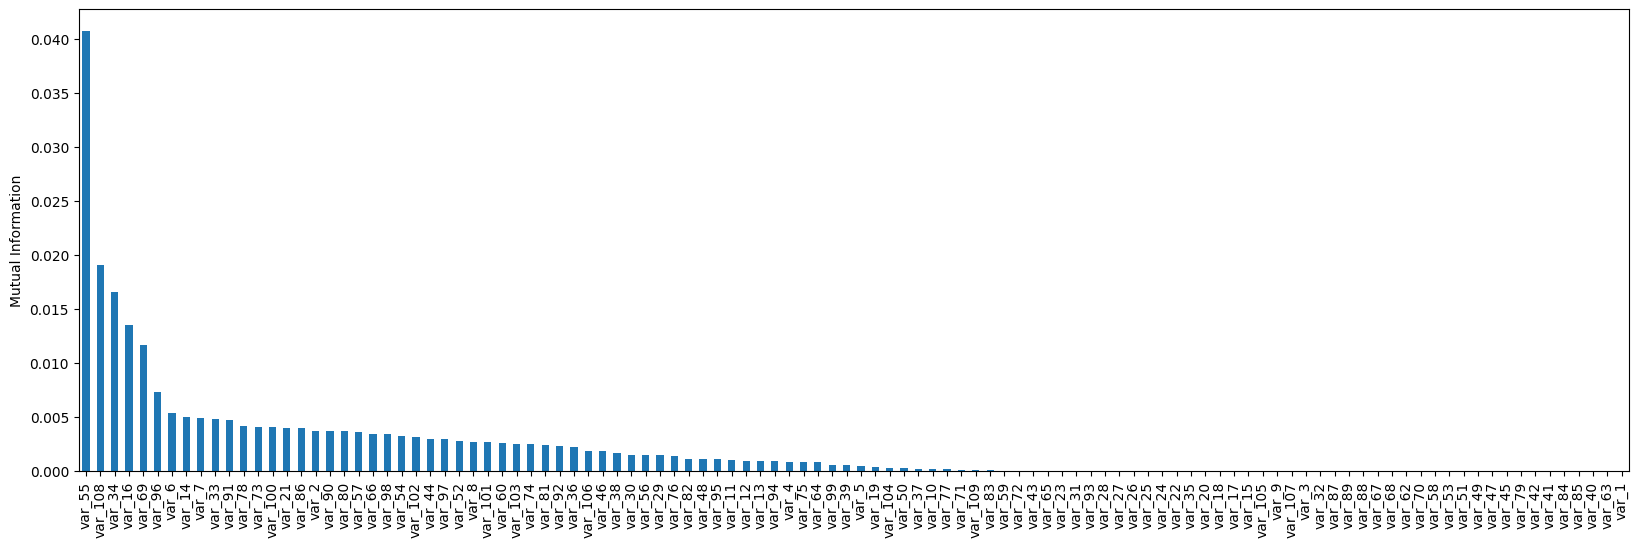

In [35]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

# calculate the mutual information between the variables and the target
# the smaller the value of the mi, the less information we can infer from the feature about the target
mi = mutual_info_classif(X_train, y_train)

# 1) let's capture the above array in a pandas series
# 2)add the variable names in the index
# 3) sort the features based on their mutual information value
# 4) and make a var plot

mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [36]:
# Select top k features based on MI
# here we will select the top 10 features based on their mutual information value

# select features
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# display features
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_16', 'var_33', 'var_34', 'var_48', 'var_55',
       'var_69', 'var_96', 'var_108'],
      dtype='object')

In [37]:
# Select the features in the top percentile
sel_ = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train, y_train)

# display the features
X_train.columns[sel_.get_support()]

Index(['var_6', 'var_7', 'var_14', 'var_16', 'var_33', 'var_34', 'var_55',
       'var_69', 'var_91', 'var_96', 'var_108'],
      dtype='object')

### Chi-square test
- Working with non-negative categorical features and categorical target (binary or multiclass).
- Chi-square used to determine if 2 samples of categorical features were extracted from the same population
    - Samples is splited by each class of target in categorical variable.
    - If samples are in the sample population, meaning there are no different from samples of categorical variables that are seperated by each target class. Thus, the categorical variable is not predictive in target.

In [48]:
from sklearn.feature_selection import chi2
from sklearn.datasets import load_wine

# Loading wine data
X,y=load_wine(return_X_y=True, as_frame = True)

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

X_new=test.fit_transform(X, y)

<AxesSubplot: >

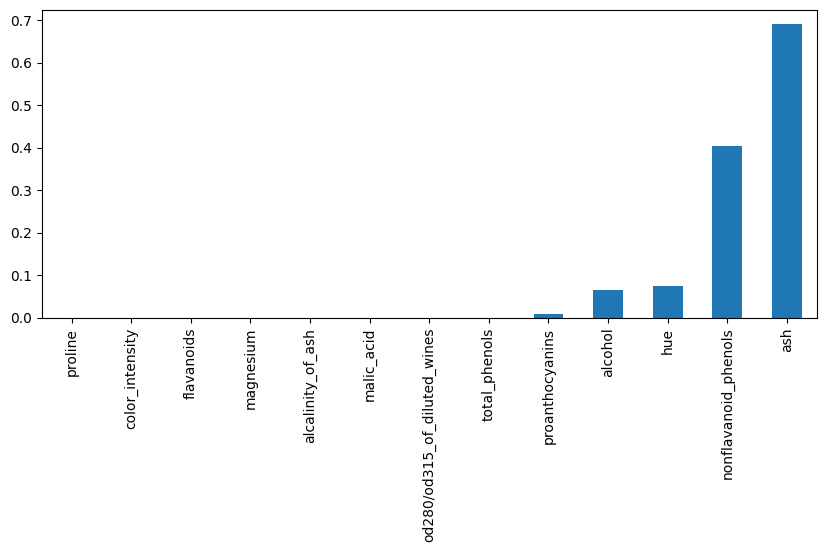

In [50]:
f_score, p_value = chi2(X, y)
chi2test = pd.Series(p_value)
chi2test.index = X.columns
chi2test.sort_values(ascending=True).plot.bar(figsize=(10, 4))

### Univariate selection (anova)
- Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target.

- **Assumption**: ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful. These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

- Need to transform features to normal shape and linear relationship before use selection process

In [39]:
# With assume that the variables show a linear relationship with the target and that they are normally distributed.

# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

<AxesSubplot: >

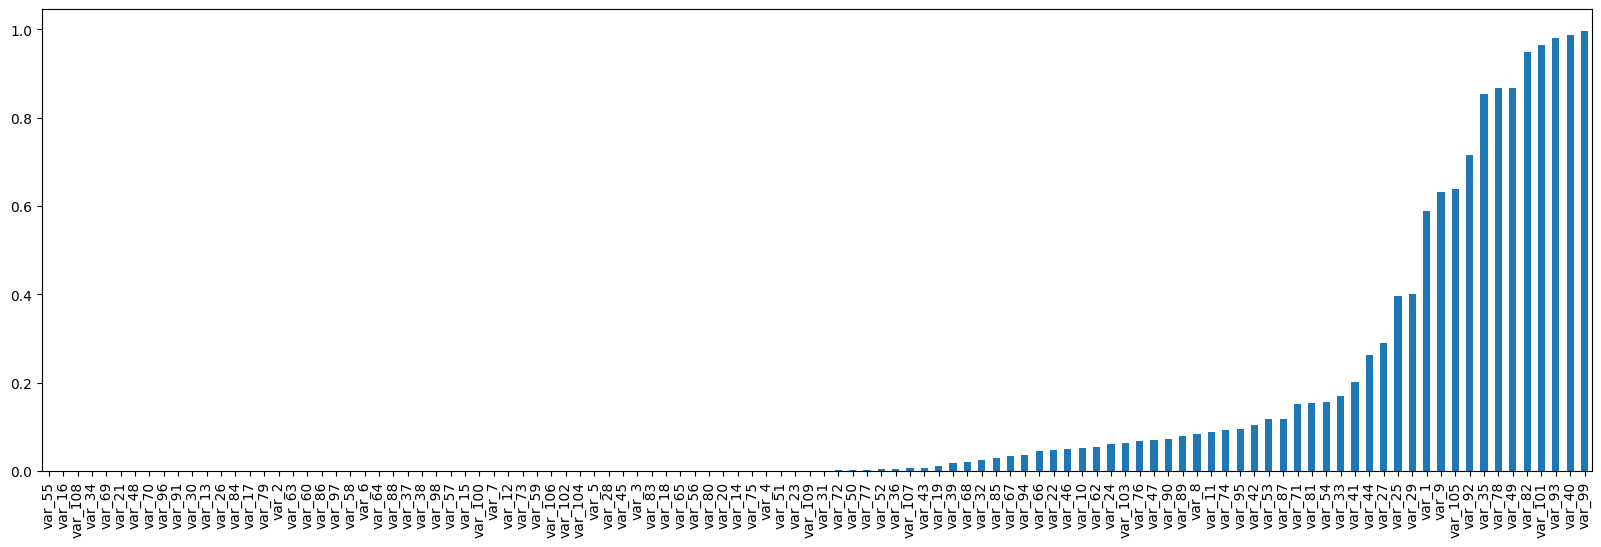

In [44]:
# calculate the univariate statistical measure between each of the variables and the target
# similarly to chi2, the output is one array with f-scores and one array with the pvalues

f_score, p_value = f_classif(X_train, y_train)


# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(p_value)
univariate.index = X_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20, 6))

The smaller the p_value the more predictive the feature is.

Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

**How can we select features based on the anova p-values?**

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features below a certain threshold, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including Anova. It will select those with the lowest pvalues.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the anova.

Alternatively, if we want to select features based on a pvalue threshold, we can do it manually.

In [43]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

# remove unwanted features from the dataset
X_train_sl = sel_.transform(X_train)

## Univariate with model performance

This procedure works as follows:

- Train a ML model per every single feature
- Determine the performance of the models
- Select features if model performance is above a certain threshold

In [52]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

Text(0, 0.5, 'roc-auc')

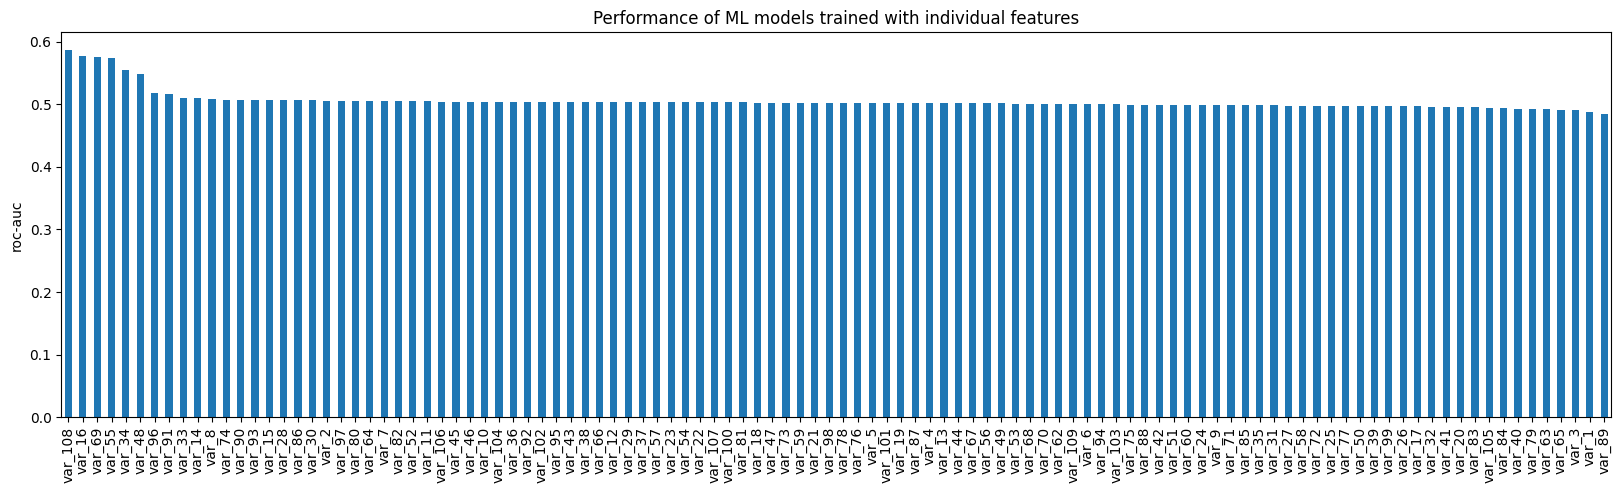

In [54]:
# set up a machine learning model
rf = RandomForestClassifier(
    n_estimators=10, random_state=1, n_jobs=4)

# set up the selector
sel = SelectBySingleFeaturePerformance(
    variables=None,
    estimator=rf,
    scoring="roc_auc",
    cv=3,
    threshold=0.5,
)

# find predictive features
sel.fit(X_train, y_train)

#  the transformer stores a dictionary of feature:metric pairs
# in this case is the roc_auc of each individual model
# we can plot feature importance sorted by importance

pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('roc-auc')

In [ ]:
# remove non-prective features

X_train_sl = sel.transform(X_train)
X_test_sl = sel.transform(X_test)

X_train_sl.shape, X_test_sl.shape

## Target mean encoding selection

**The procedure consists in the following steps**:

1) For each categorical variable:
- 1.1. Separate into train and test
- 1.2. Determine the mean value of the target within each label of the categorical variable using the train set
- 1.3. Use that mean target value per label as the prediction (using the test set) and calculate the roc-auc.
2) For each numerical variable:
- 2.1. Separate into train and test  
- 2.2. Divide the variable into 100 quantiles
- 2.3. Calculate the mean target within each quantile using the training set 
- 2.4. Use that mean target value / bin as the prediction (using the test set) and calculate the roc-auc

**Advantages**:
- `Speed`: computing mean and quantiles is direct and efficient
- `Stability respect to scale`: extreme values for continuous variables do not skew the predictions
- Comparable between categorical and numerical variables
- Accommodation of non-linearities

**Challenge**:
- We can use any performance metric, and difference metrics may lead to difference selected features:
    - Classification: ROC_AUC, accuracy, precision, recall,...
    - Regression: MSE, RMSE, R2,...
    
**Reference**:
[Predicting customer behaviour: The University of Melbourne's KDD Cup Report. Miller et al. JMLR Workshop and Conference Proceedings 7:45-55](http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf)

In [58]:
# Feature-engine automatically detects categorical and numerical variables.
from feature_engine.selection import SelectByTargetMeanPerformance

# feautre engine automates the selection for both
# categorical and numerical variables

sel = SelectByTargetMeanPerformance(
    variables=None, # automatically finds categorical and numerical variables
    scoring="roc_auc", # the metric to evaluate performance
    threshold=0.5, # the threshold for feature selection, 
    bins=3, # the number of intervals to discretise the numerical variables
    strategy="equal_frequency", # whether the intervals should be of equal size or equal number of observations
    cv=2,# cross validation
    regression=False, # whether this is regression or classification
)

sel.fit(X_train, y_train)

SelectByTargetMeanPerformance(bins=3, cv=2, strategy='equal_frequency',
                              threshold=0.5)

In [61]:
X_train_sl = sel.transform(X_train)
X_test_sl = sel.transform(X_test)

X_train_sl.shape, X_test_sl.shape

((35000, 95), (15000, 95))